In [ ]:
# default_exp gbe.sst.reliability

# SST - Reliability

<div>
    <p style="float: left;"><img src="images/fruit_game.png" alt="Drawing" style="width: 200px; border-right:10px solid white"/> 
        
<div>

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%reload_ext rpy2.ipython
import seaborn as sns
from matplotlib import pyplot as plt
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", font_scale = 1.3, rc=custom_params)
from trr265 import plotting

In [ ]:
#export
%load_ext autoreload
%autoreload 2
from trr265.gbe.sst.data_provider import SSTDataProvider
import trr265.gbe.sst.scoring as sst_scoring 
import trr265.stats as stats
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the data
In this notebook, all tests and examples are run on the initial baseline dataset.

In [ ]:
# Getting raw data
dp = SSTDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_sst_data()
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("is_initial and is_baseline")

## Test-retest reliability

### Based on integration method

R[write to console]: Loading required package: psych



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.516,3.133,244.0,245.0,0.0,0.435,0.589,".52 (.43, .59)"
Single_random_raters,ICC2,0.528,3.513,244.0,244.0,0.0,0.423,0.615,".53 (.42, .62)"
Single_fixed_raters,ICC3,0.557,3.513,244.0,244.0,0.0,0.480,0.625,".56 (.48, .63)"
Average_raters_absolute,ICC1k,0.681,3.133,244.0,245.0,0.0,0.606,0.742,".68 (.61, .74)"
Average_random_raters,ICC2k,0.691,3.513,244.0,244.0,0.0,0.594,0.762,".69 (.59, .76)"
Average_fixed_raters,ICC3k,0.715,3.513,244.0,244.0,0.0,0.648,0.769,".72 (.65, .77)"


,variance,Percent
ID,2883.751,0.528
Items,277.752,0.051
Residual,2295.412,0.421
Total,5456.916,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


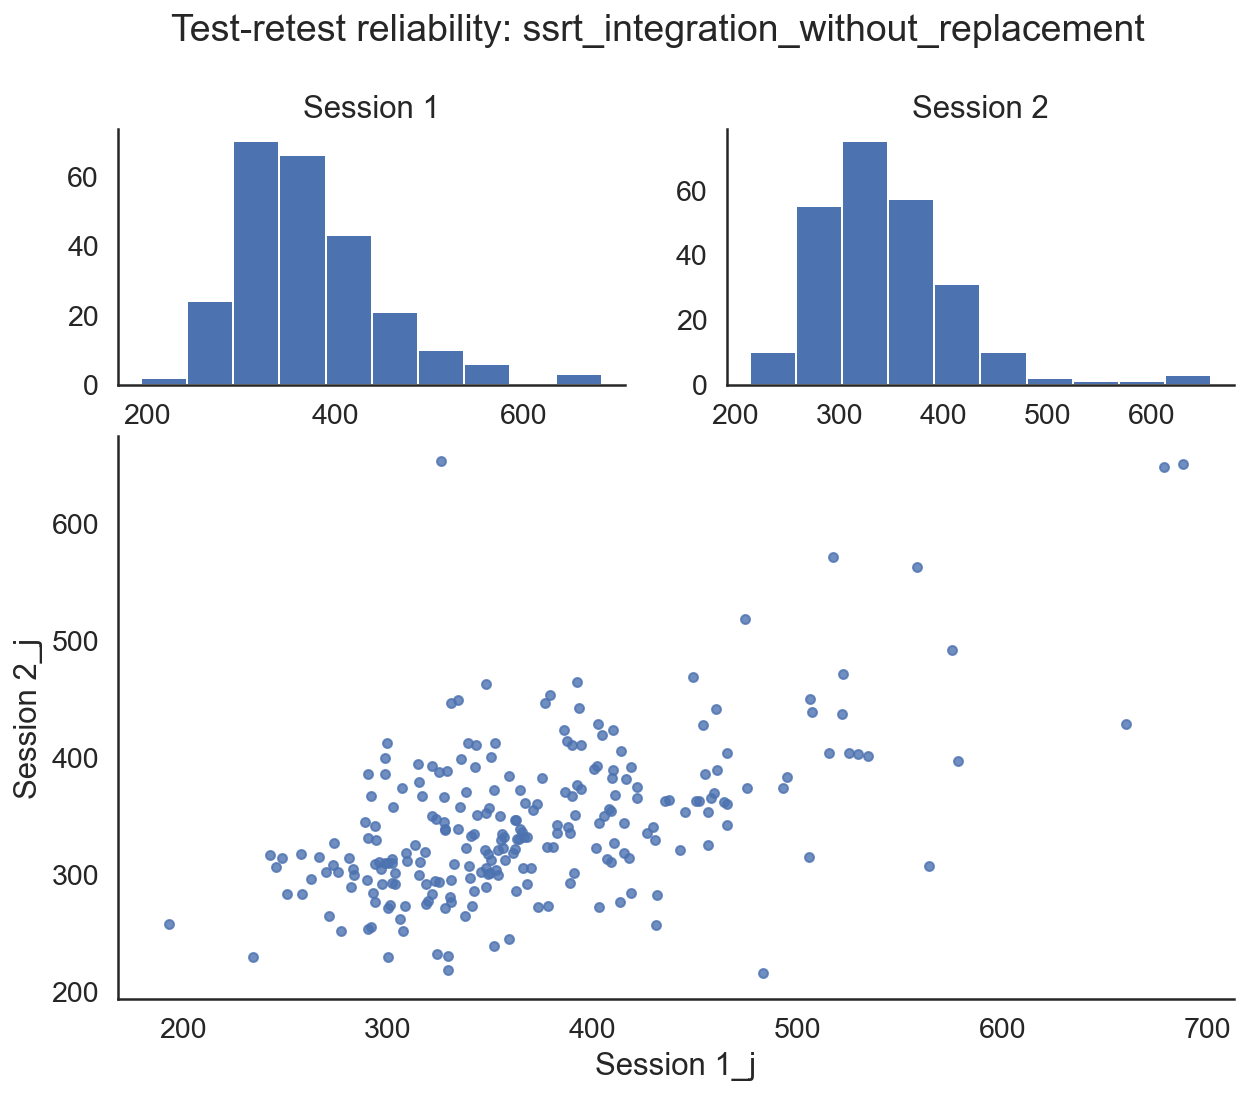

In [ ]:
_df = sst_scoring.get_integration_without_replacement_ssrts(df)#['max_level_no_distractor_1']
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_integration_wo_replacement = stats.analyze_reliability(_df, dependent = 'ssrt_integration_without_replacement', add_jitter = True)

### Based on mean method

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.461,2.709,244.0,245.0,0.0,0.374,0.540,".46 (.37, .54)"
Single_random_raters,ICC2,0.479,3.103,244.0,244.0,0.0,0.362,0.575,".48 (.36, .57)"
Single_fixed_raters,ICC3,0.513,3.103,244.0,244.0,0.0,0.431,0.586,".51 (.43, .59)"
Average_raters_absolute,ICC1k,0.631,2.709,244.0,245.0,0.0,0.544,0.701,".63 (.54, .70)"
Average_random_raters,ICC2k,0.647,3.103,244.0,244.0,0.0,0.531,0.730,".65 (.53, .73)"
Average_fixed_raters,ICC3k,0.678,3.103,244.0,244.0,0.0,0.602,0.739,".68 (.60, .74)"


,variance,Percent
ID,1905.234,0.479
Items,262.962,0.066
Residual,1812.284,0.455
Total,3980.480,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


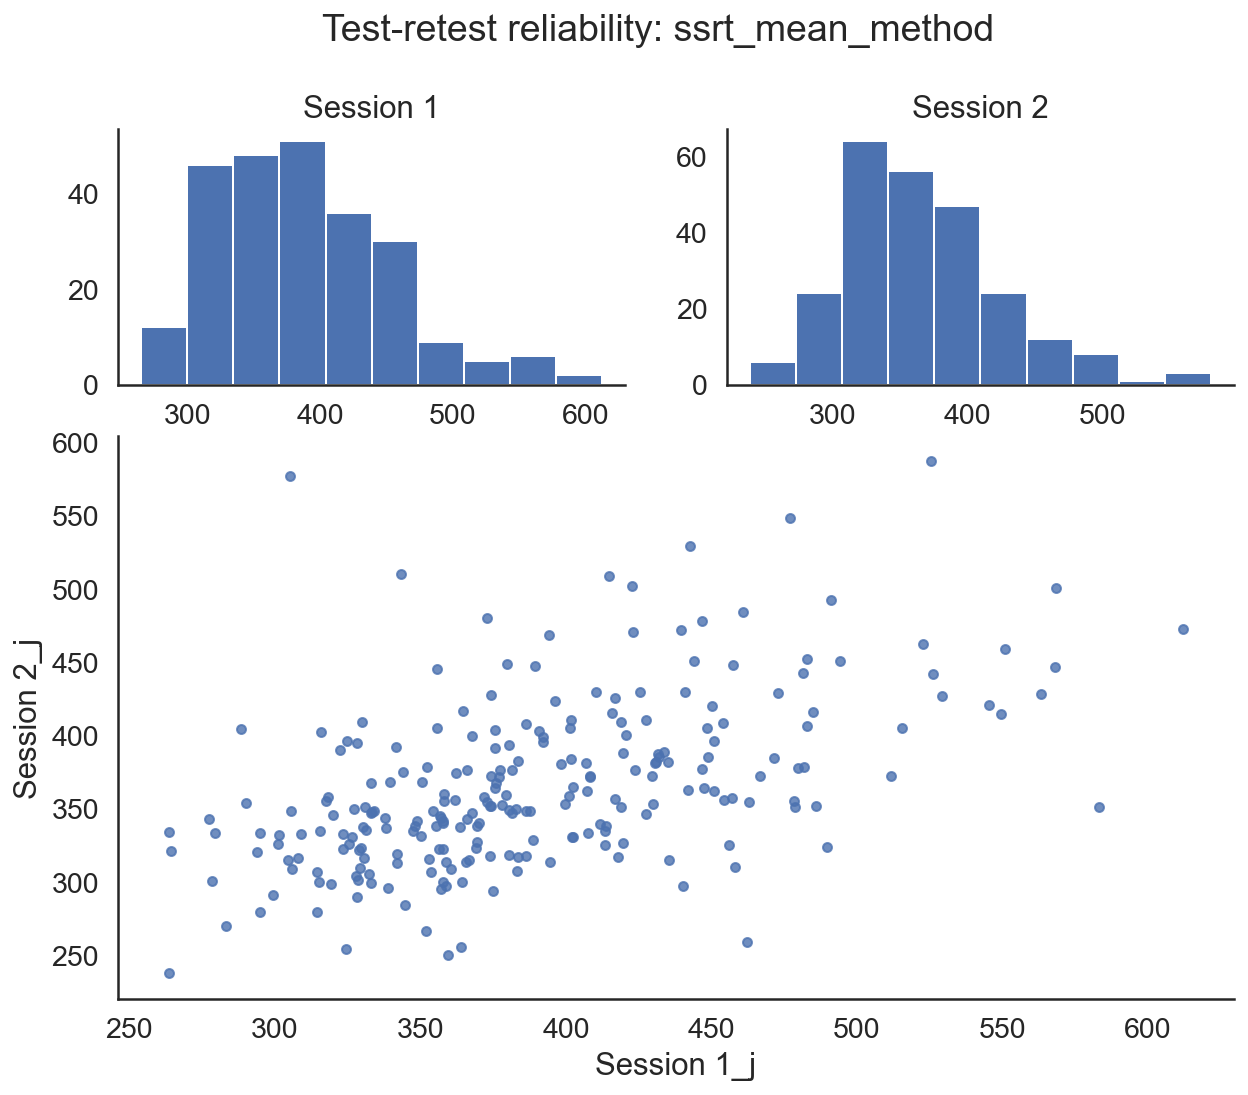

In [ ]:
_df = sst_scoring.get_mean_method_ssrts(df)#['max_level_no_distractor_1']
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean = stats.analyze_reliability(_df, dependent = 'ssrt_mean_method', add_jitter = True)

### Based on predicted values (separate models)
Test-retest reliability for scores predicted by separate models for each session (for calculation of scores see `sst_scoring.get_ssrt_sep`).

In [ ]:
%%capture
_df, ms = sst_scoring.get_ssrt_sep(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.472,2.788,244.0,245.0,0.0,0.386,0.550,".47 (.39, .55)"
Single_random_raters,ICC2,0.489,3.187,244.0,244.0,0.0,0.373,0.584,".49 (.37, .58)"
Single_fixed_raters,ICC3,0.522,3.187,244.0,244.0,0.0,0.441,0.595,".52 (.44, .59)"
Average_raters_absolute,ICC1k,0.641,2.788,244.0,245.0,0.0,0.557,0.709,".64 (.56, .71)"
Average_random_raters,ICC2k,0.657,3.187,244.0,244.0,0.0,0.543,0.737,".66 (.54, .74)"
Average_fixed_raters,ICC3k,0.686,3.187,244.0,244.0,0.0,0.612,0.746,".69 (.61, .75)"


,variance,Percent
ID,1930.054,0.489
Items,252.671,0.064
Residual,1765.209,0.447
Total,3947.934,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


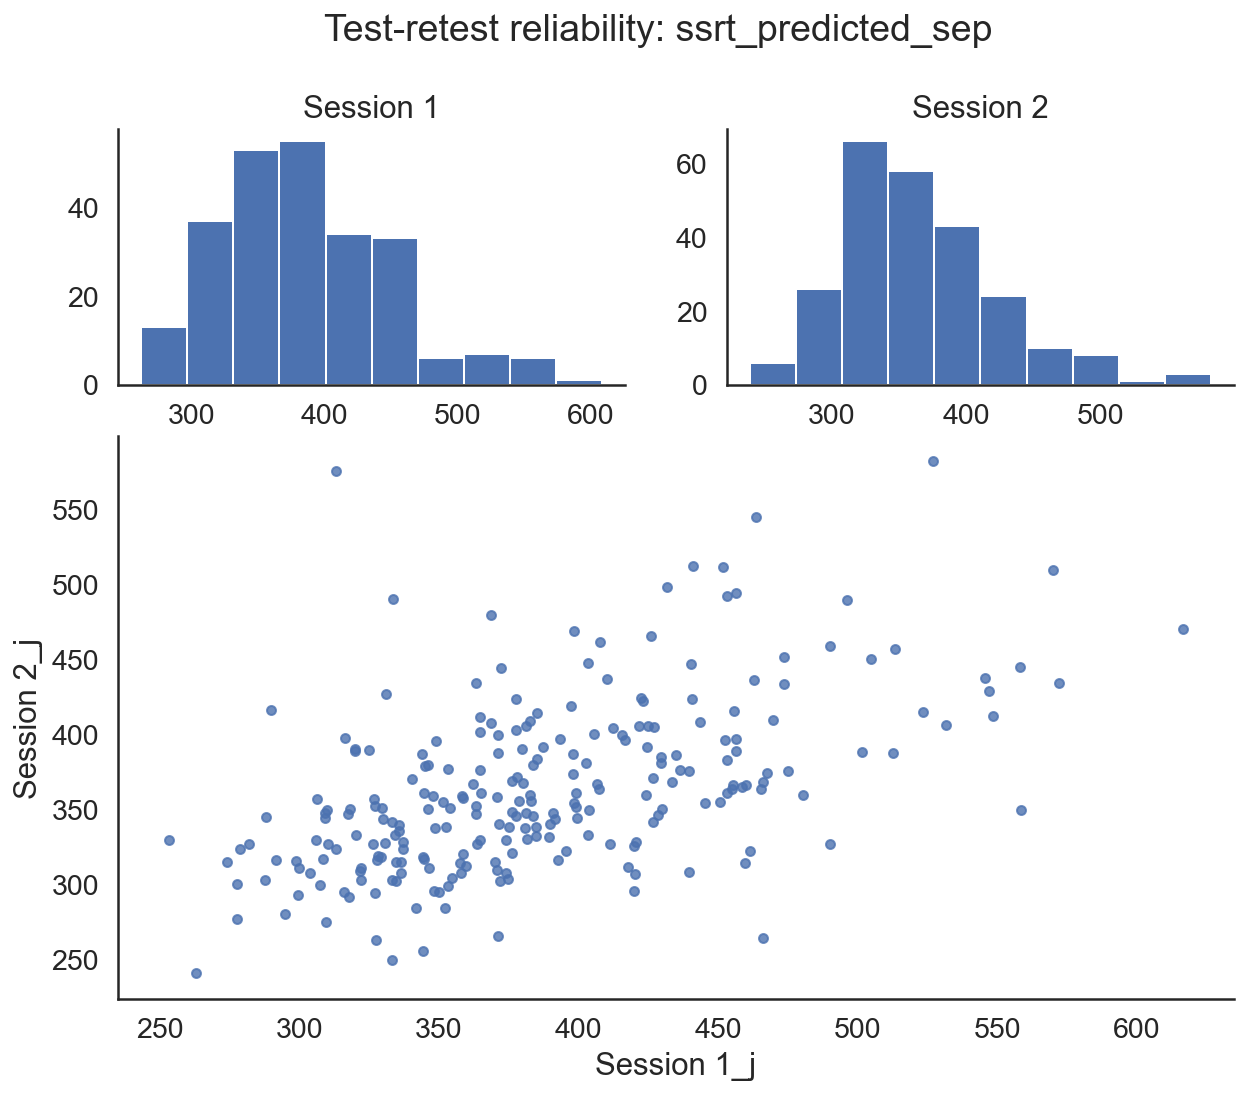

In [ ]:
iccs_perc_predicted_sep = stats.analyze_reliability(_df, dependent = 'ssrt_predicted_sep', add_jitter = True)

### Based on predicted values (joint model)
Test-retest reliability for scores predicted by a joint model (for calculation of scores see `sst_scoring.get_ssrt_predicted_joint`).

In [ ]:
_df, ms = sst_scoring.get_ssrt_predicted_joint(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.667,5.000,244.0,245.0,0.0,0.604,0.721,".67 (.60, .72)"
Single_random_raters,ICC2,0.673,5.648,244.0,244.0,0.0,0.579,0.744,".67 (.58, .74)"
Single_fixed_raters,ICC3,0.699,5.648,244.0,244.0,0.0,0.641,0.749,".70 (.64, .75)"
Average_raters_absolute,ICC1k,0.800,5.000,244.0,245.0,0.0,0.753,0.838,".80 (.75, .84)"
Average_random_raters,ICC2k,0.804,5.648,244.0,244.0,0.0,0.734,0.853,".80 (.73, .85)"
Average_fixed_raters,ICC3k,0.823,5.648,244.0,244.0,0.0,0.781,0.857,".82 (.78, .86)"


,variance,Percent
ID,1965.398,0.673
Items,109.569,0.038
Residual,845.652,0.290
Total,2920.618,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


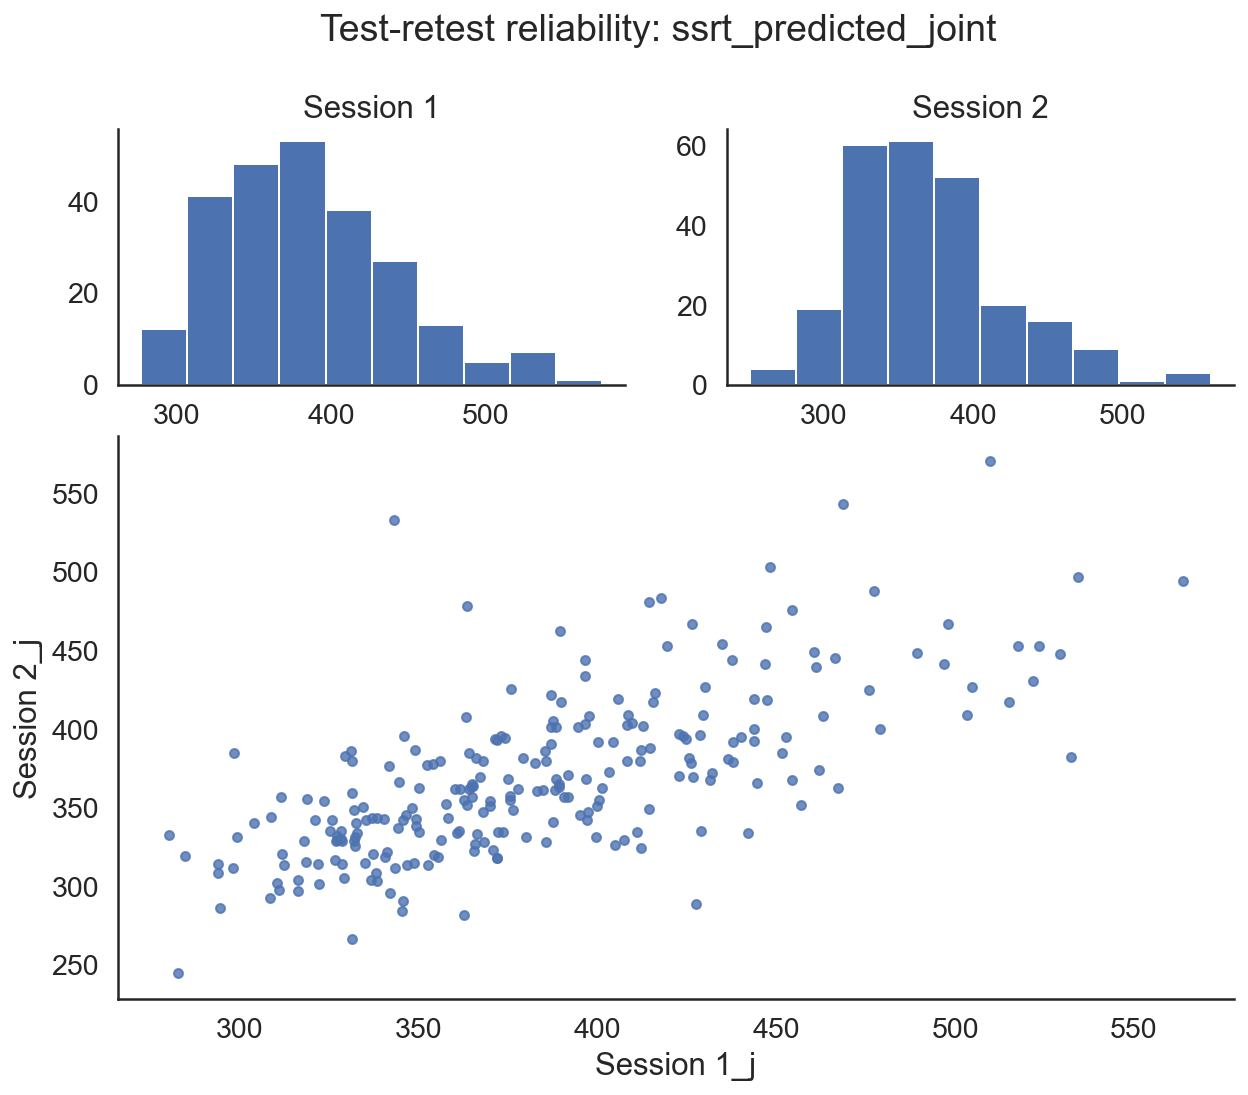

In [ ]:
iccs_perc_predicted_joint = stats.analyze_reliability(_df, dependent = 'ssrt_predicted_joint', add_jitter = True)

### Based on model-calculated variances

In [ ]:
model_calc = stats.get_model_calculated_icc(ms)
model_calc['icc']

R[write to console]: Loading required package: insight



0.6975249632896694

## Comparison of methods

### All methods

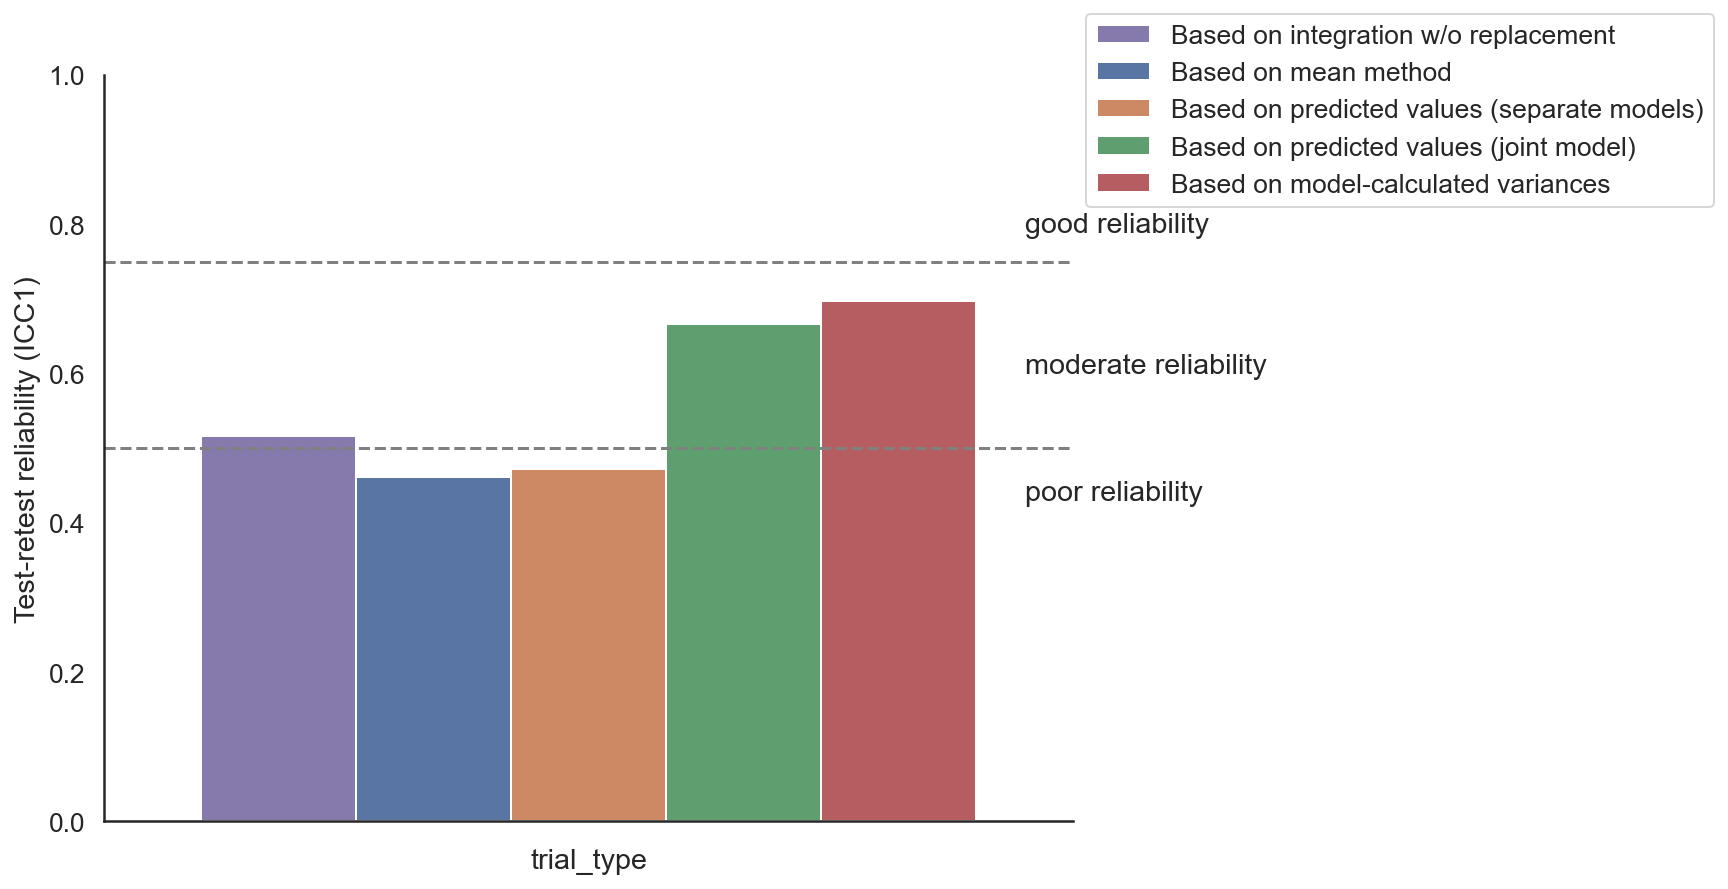

In [ ]:
iccs = {
    "Based on integration w/o replacement_": iccs_integration_wo_replacement,
    "mean_": iccs_mean,
    "trial_sep_": iccs_perc_predicted_sep,
    "trial_joint_": iccs_perc_predicted_joint,
    "model_calc_": model_calc
}

palette = [sns.color_palette()[4]] + sns.color_palette()
g = plotting.icc_comparison_plot(iccs, aspect = 1.3,qualitative_labels = True, 
                        x_offset = 0.45, font_scale = 1.2, palette = palette)

### Selected methods for manuscript

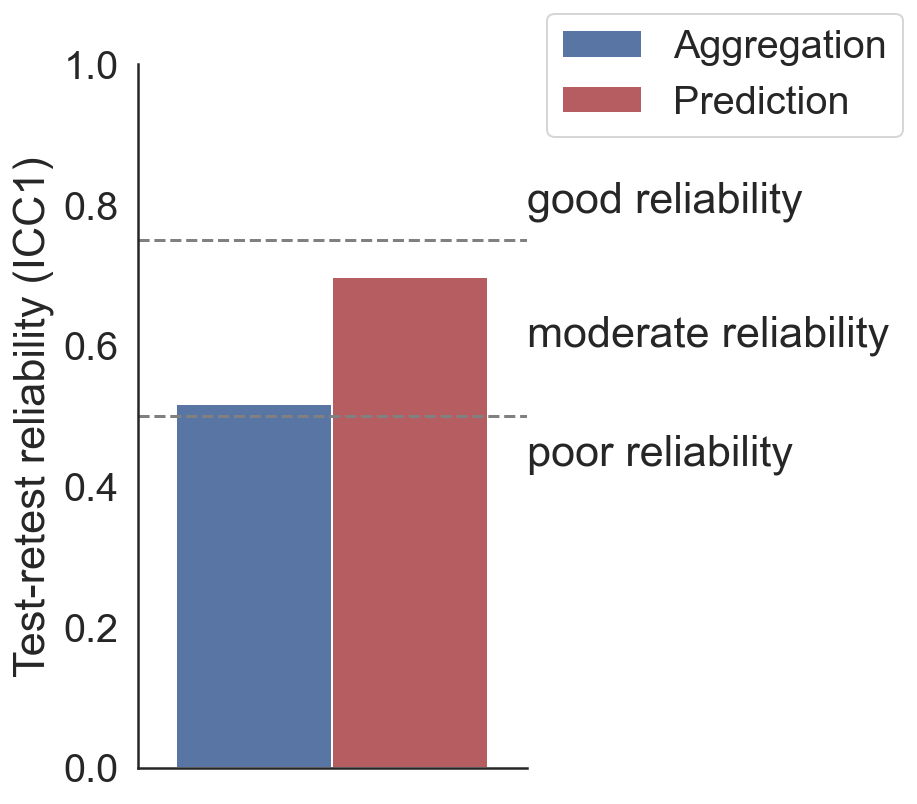

In [ ]:
iccs = {
    "Aggregation_": iccs_integration_wo_replacement,
    "Prediction_": model_calc,
}

palette=sns.color_palette([(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)])
g = plotting.icc_comparison_plot(iccs, 
                       
                       palette = palette,
                       aspect = .7,
                       qualitative_labels = True,
                       x_offset = .5,
                       font_scale = 1.8)

ax = g.axes[0][0]

ax.set_xlabel('');


## Variance proportions

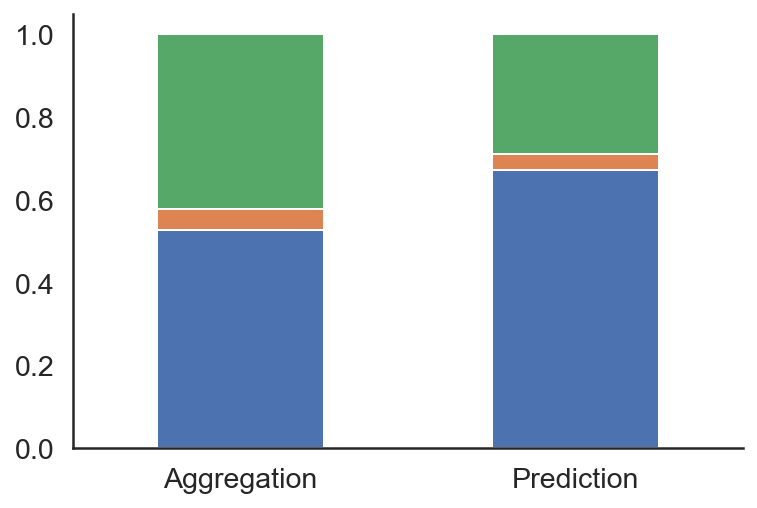

In [ ]:
ax = stats.var_comp_plot({'Aggregation':iccs_integration_wo_replacement,'Prediction':iccs_perc_predicted_joint})
ax.get_legend().remove()

## Effect of time

### Absolute variance

N = 101


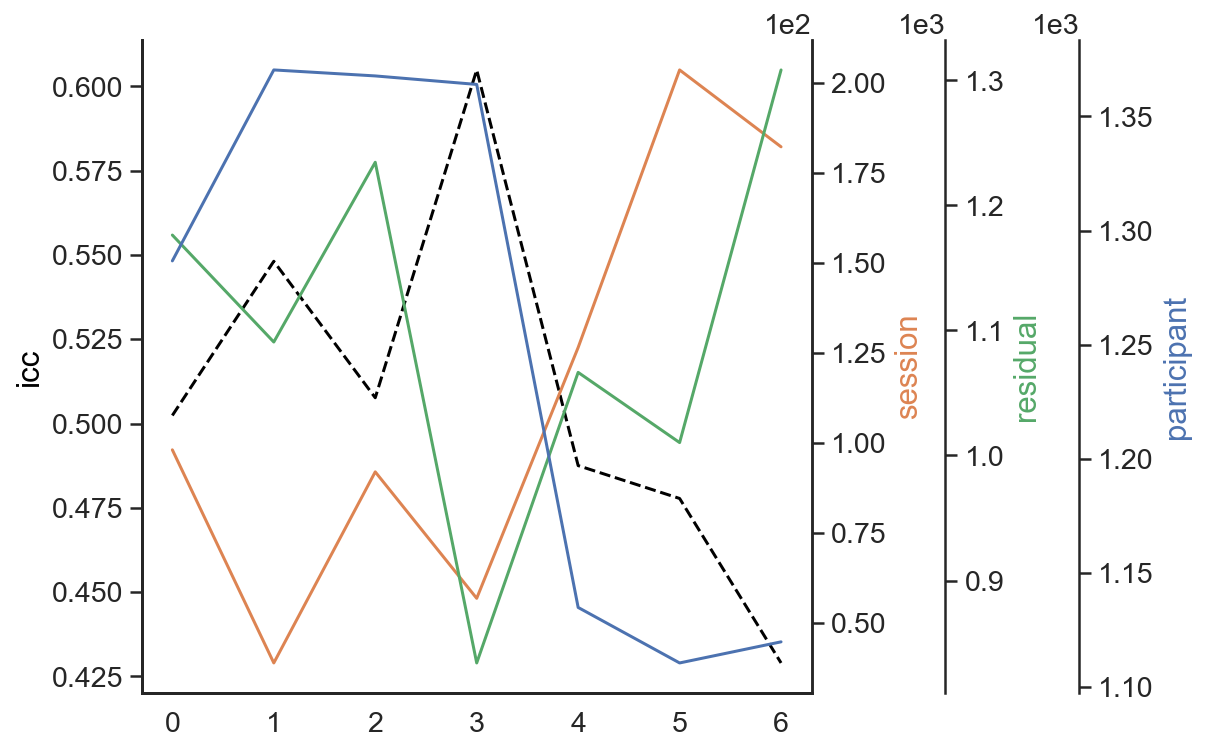

In [ ]:
ax = stats.plot_time_effect(scores, 8, "ssrt_predicted_joint", scaling = 'variance', change = False)
ax.figure.set_size_inches(6, 6)

### Absolute variance change

N = 101


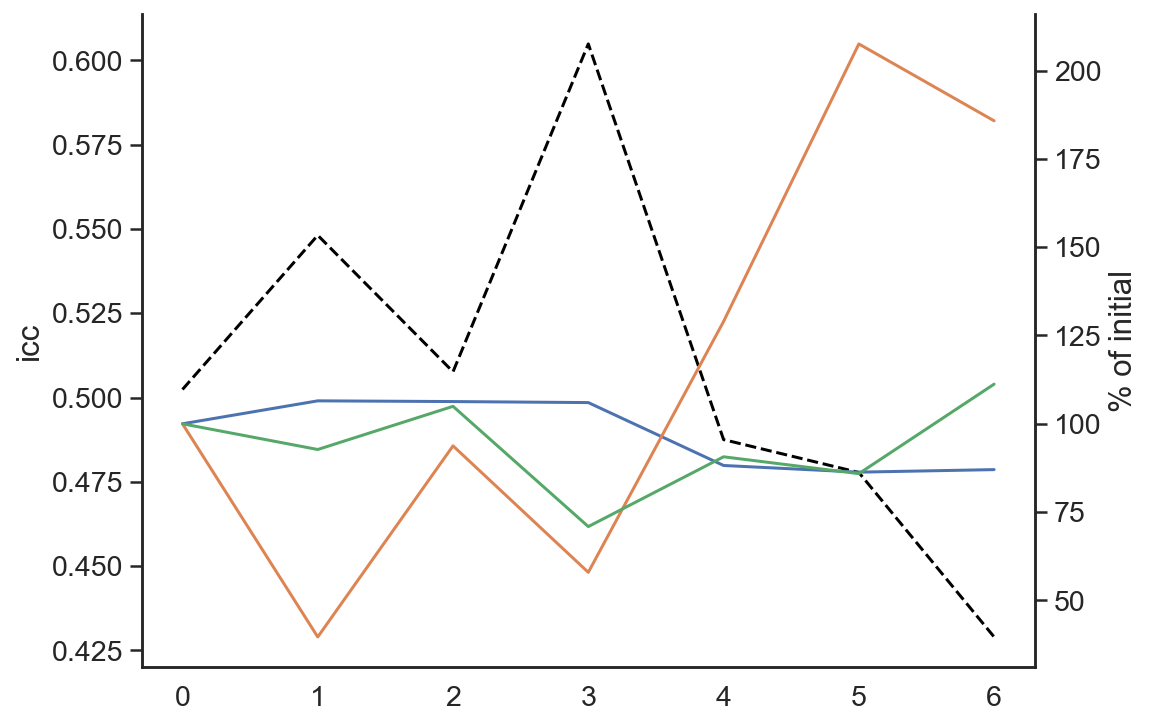

In [ ]:
ax = stats.plot_time_effect(scores, 8, "ssrt_predicted_joint", scaling = 'variance', change = True)
ax.figure.set_size_inches(8, 6)

## Effect of time

In [ ]:
scores = stats.get_scores(dp, dp.get_sst_data, sst_scoring.get_ssrt_predicted_joint)

N = 101


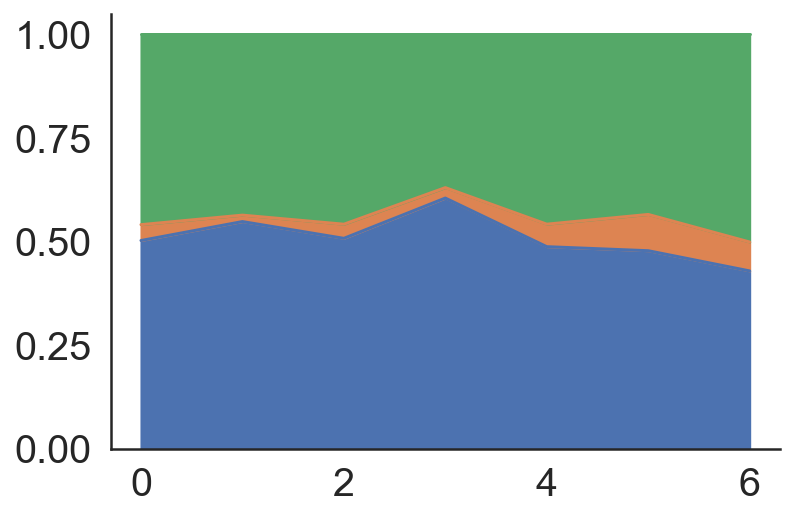

In [ ]:
stats.plot_time_effect(scores, 8, "ssrt_predicted_joint", legend = False)

N = 101


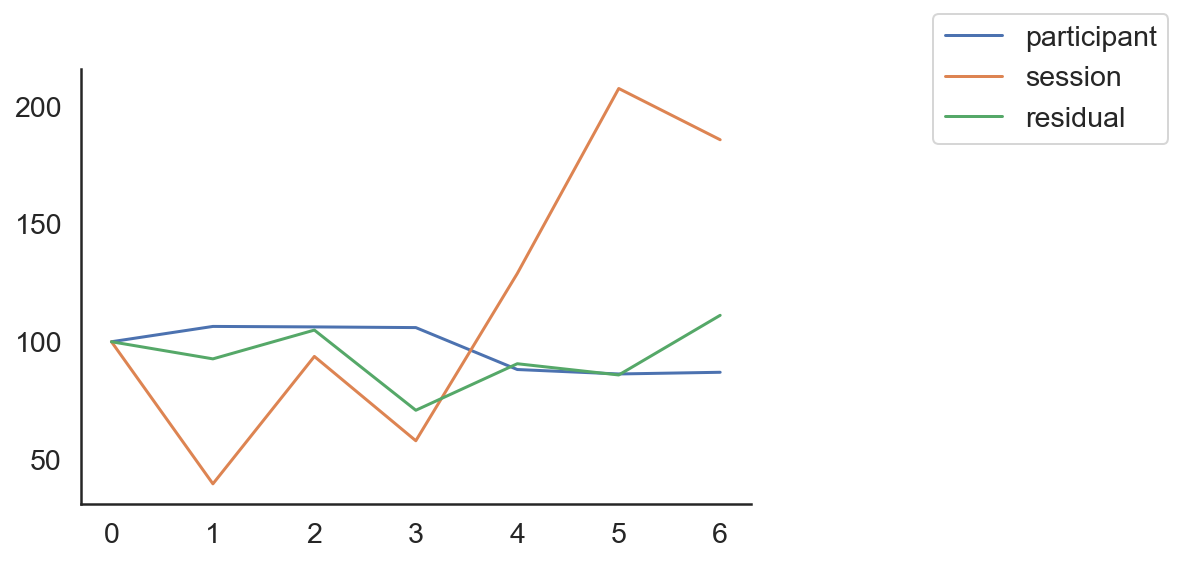

In [ ]:
stats.plot_time_effect(scores, 8, "ssrt_predicted_joint", scaling = 'variance', change = True)

N = 101


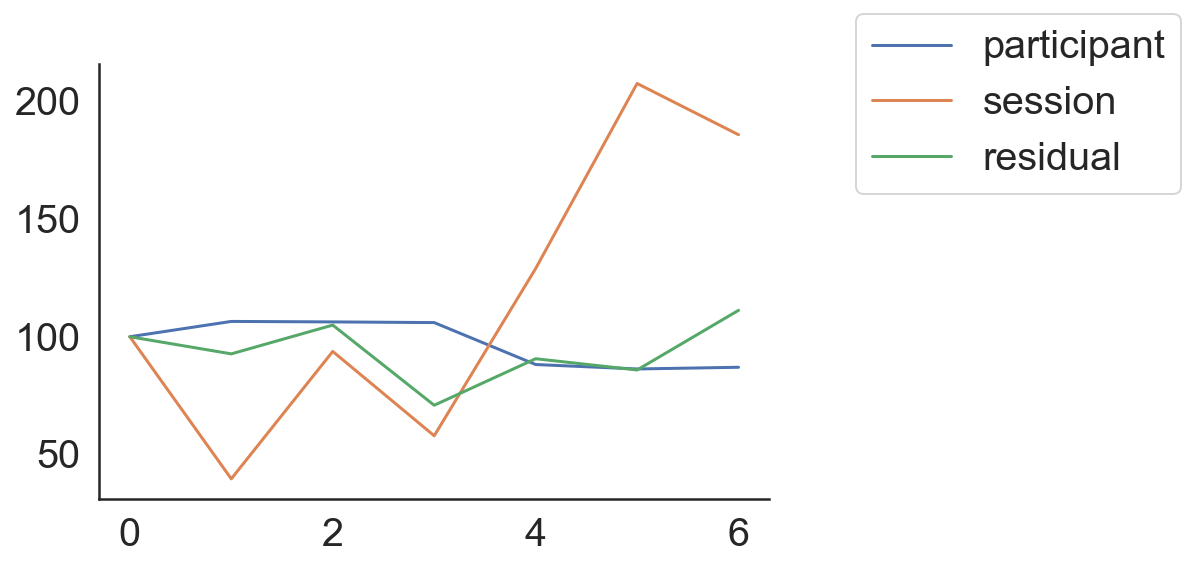

In [ ]:
def get_icc_and_variance(_df,
            dependent,
           icc_type = 'ICC2', scaling = 'Percent'): 
    '''Helper function that gets ICCs and variances'''
    outcomes = stats.analyze_reliability(_df, dependent = dependent, silent = True)['iccs']
    icc = outcomes[0].query('type=="%s"'%icc_type)['ICC'].iloc[0]
    variances = outcomes[1].T
    variances.columns = ['Participant','Session','Residual','Total']
    variances = variances.loc[scaling]
    return icc,variances.loc['Participant'],variances.loc['Session'],variances.loc['Residual']

def plot_time_effect(_df, sessions, dependent, legend = False, scaling = 'Percent', change = False):
    time_data = []
    # Checking which participants have all sessions
    pps = _df.query('session_number<%d'%(sessions+1)).groupby('participant')[_df.columns[0]].agg(lambda x: len(x.dropna()))==sessions
    pps = pps[pps].index
    print("N = %d"%(len(pps)))

    for i in range(sessions-1):
        session_filter = "(session_number==1) or (session_number==%d)"%(i+2)
        __df = _df.query(session_filter)
        __df = __df[__df.participant.isin(pps)]
        d = {}
        d['icc'],d['participant'],d['session'],d['residual'] = get_icc_and_variance(__df, dependent, scaling = scaling)
        time_data.append(d)
    df = pd.DataFrame(time_data, index = pd.Series(range(sessions-1)))
    if change:
        df = (df/df.iloc[0])*100
    ax = df[['participant','session','residual']].plot(legend = legend)
    #display(df)
    #ax = df.plot(y="participant", legend=False, color = sns.color_palette()[0])
    #ax2 = ax.twinx()
    #df.plot(y="session", ax=ax2, legend=False, color = sns.color_palette()[1])
    #ax3 = ax.twinx()
    #df.plot(y="residual", ax=ax2, legend=False, color = sns.color_palette()[2])
    ax.figure.legend(bbox_to_anchor=[1.4, 1])
    ax.xaxis.get_major_locator().set_params(integer=True)
    
plot_time_effect(scores, 8, "ssrt_predicted_joint", scaling = 'variance', change = True)